In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from redshift_fit_lib import *
from scipy.interpolate import interp1d

In [2]:
loaddir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/LDSS_Night1/'

# Flux calibration

In [3]:
# Define this for automation later
bandpasses_lam = {'pseudo_g': [4800,5800], 'pseudo_r': [6000,7500], 'pseudo_i': [7500,9000], 'F814W': [6800,10000]}

In [4]:
# Define a function that, given a spectrum, can compute the AB magnitude in a given bandpass

def calc_AB_mag(wav, f_lam, df_lam, bandpass, n=3):
    
    # n = # of round figures to return
    
    # First, slice up the spectrum to isolate points within the bandpass
    bandpass_mask = ((wav>bandpass[0])&(wav<bandpass[1]))
    
    wav_mask = wav[bandpass_mask]
    f_lam_mask = f_lam[bandpass_mask]
    df_lam_mask = df_lam[bandpass_mask]
    
    # Then convert f_lam to f_nu
    
    # Conversion first converts ergs/cm^2/s/Å to W/m^2/m
    # Then converts wavelength in Å to wavelength in m
    # Then applies the speed of light in m/s
    # Then converts f_nu from W/m^2/Hz to Jy
    f_nu_mask = wav_mask**2*f_lam_mask*(3.34e+4)
    df_nu_mask = wav_mask**2*df_lam_mask*(3.34e+4) 
    
    # Also get the relevant frequencies (in Hz) in the bandpass
    c = 3e+8 # in m/s
    nu_mask = c/(wav_mask*1e-10) # Note that nu_mask is decreasing
  
    # Get arrays for counts_nu, modulo h
    counts_nu = f_nu_mask/nu_mask
    dcounts_nu = df_nu_mask/nu_mask
    counts_ref_nu = 3631/nu_mask
    
    # Make a uniform array of nu_mask
    dnu_mask = np.median(nu_mask[1:]-nu_mask[:-1]) # This will be negative
    nu_mask_unif = np.arange(nu_mask[0], nu_mask[-1]+dnu_mask, dnu_mask)
        
    # Interpolate counts along uniform frequency array
    counts_nu_interp = interp1d(nu_mask, counts_nu, fill_value='extrapolate')(nu_mask_unif)
    dcounts_nu_interp = interp1d(nu_mask, dcounts_nu, fill_value='extrapolate')(nu_mask_unif)
    counts_ref_interp = interp1d(nu_mask, counts_ref_nu, fill_value='extrapolate')(nu_mask_unif)
    
    # Compute integrated counts
    counts = np.sum(counts_nu_interp)
    dcounts = np.sqrt(np.sum(dcounts_nu_interp**2)) # np.sum(dcounts_nu_interp)
    counts_ref = np.sum(counts_ref_interp)
        
    # Compute the magnitude
    AB_mag = -2.5*np.log10(counts/counts_ref) 
    
    # Compute error in the magnitude
    dAB_mag = np.abs((-2.5/np.log(10))*(dcounts/counts))
            
    return np.round(AB_mag,n), np.round(dAB_mag,n)

# Mask 1 slits

## Slit 392

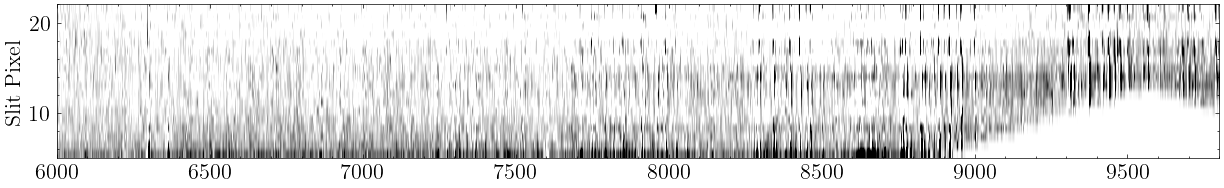

In [5]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 392, vmin=0, vmax=50)

In [6]:
#eval_spec_z(loaddir, 392)

In [7]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 392)

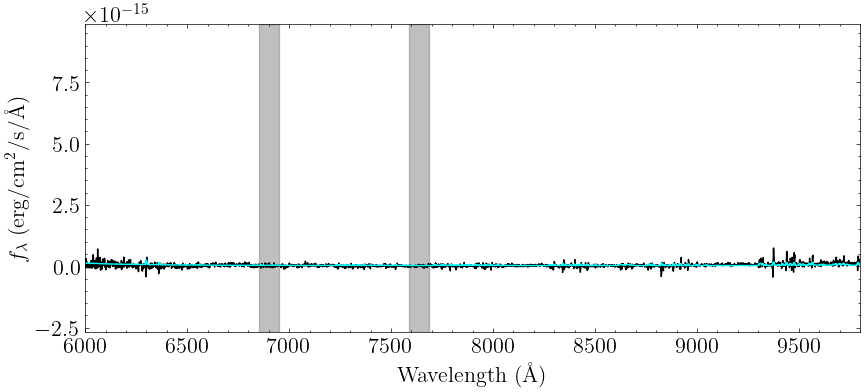

In [8]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 392)
#plot_gal_lines(ax, z_best, plot_list=['OII', 'CaIIH', 'CaIIK', 'G-band', 'Hb'], pos_y=700)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-1e-15,5e-15)

In [9]:
wav, flux, err = load_ldss_spec_1d(loaddir, 1, 392)

In [10]:
wav, spec_2d = load_ldss_spec_2d(loaddir, 1, 392)

In [11]:
wav

array([ 6000.        ,  6001.16009281,  6002.32018561, ...,
       10996.51972158, 10997.67981439, 10998.83990719])

## Slit 385

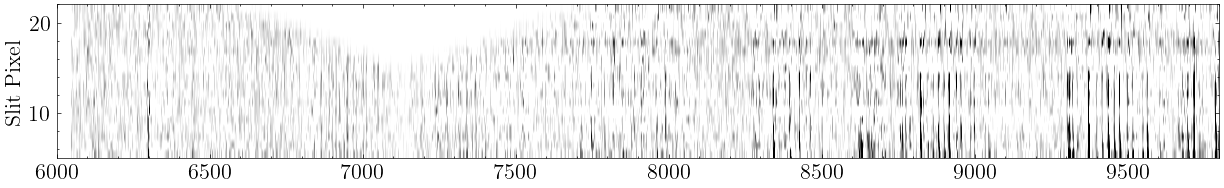

In [12]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 385, vmin=0, vmax=50)

In [13]:
#eval_spec_z(loaddir, 385)

In [14]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 385)

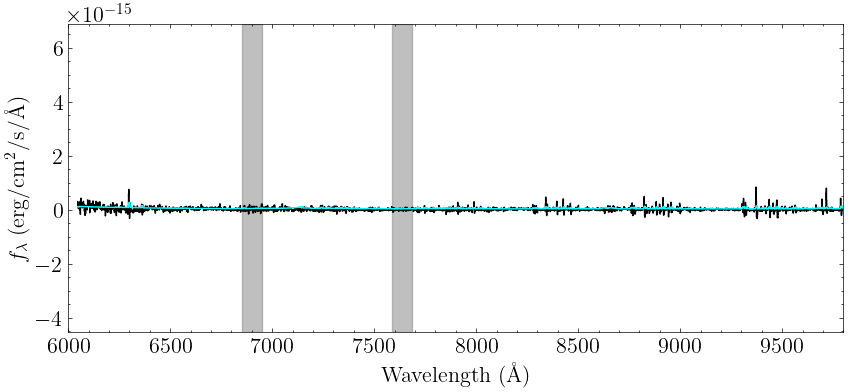

In [15]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 385)
#plot_gal_lines(ax, z_best, plot_list=['OII', 'CaIIH', 'CaIIK', 'G-band', 'Hb'], pos_y=700)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 381

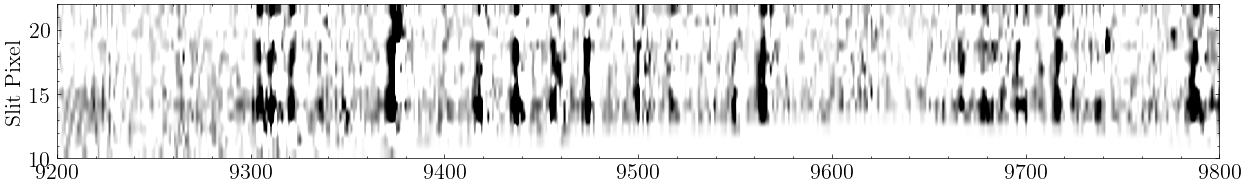

In [16]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 381, vmin=0, vmax=50, 
             wav_min=9200,
             y_min=10)

In [17]:
#eval_spec_z(loaddir, 381)

In [18]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 381)

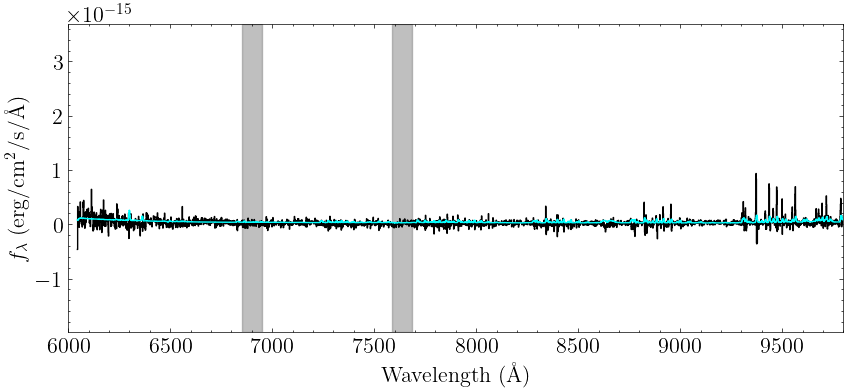

In [19]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 381)
#plot_gal_lines(ax, z_best, plot_list=['OIII','G-band', 'Hb'], pos_y=700)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 760

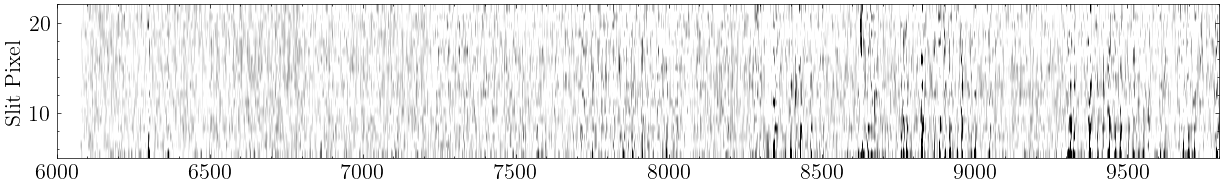

In [20]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 760, vmin=0, vmax=50)

In [21]:
#eval_spec_z(loaddir, 760)

In [22]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 760)

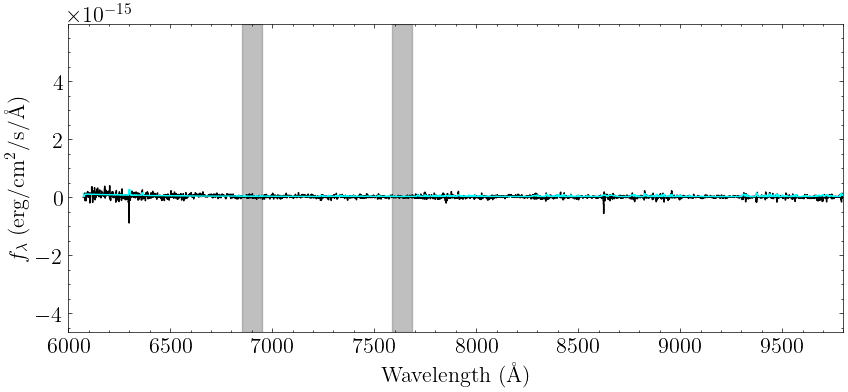

In [23]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 760)
#plot_gal_lines(ax, z_best, plot_list=['OIII','G-band', 'Hb'], pos_y=700)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 412 - bad

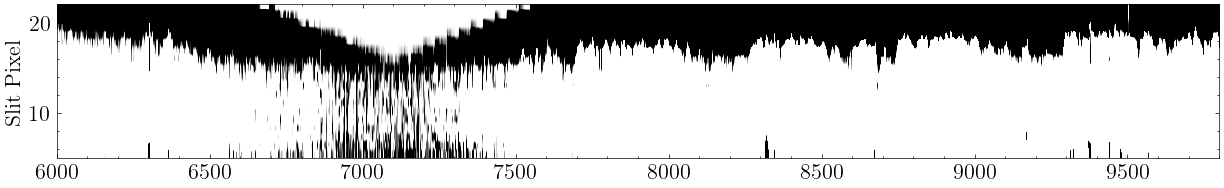

In [24]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 412, vmin=0, vmax=10)

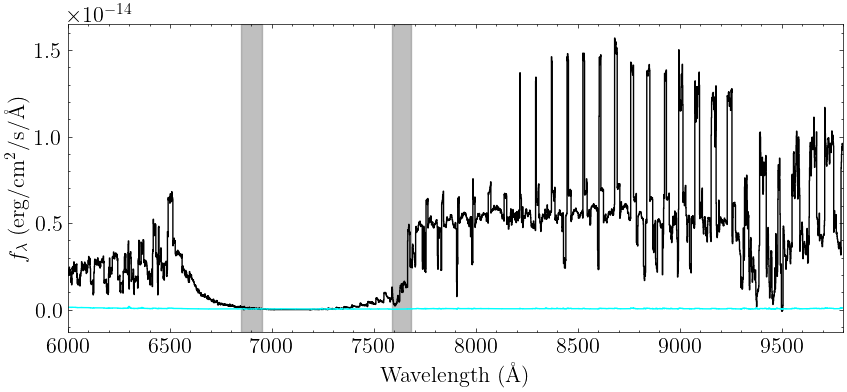

In [25]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 412)
#plot_gal_lines(ax, z_best, plot_list=['OIII','G-band', 'Hb'], pos_y=700)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 884

In [206]:
#eval_spec_z(loaddir, 884)

In [207]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 884, z_min=0.6)

(-1e-16, 6e-16)

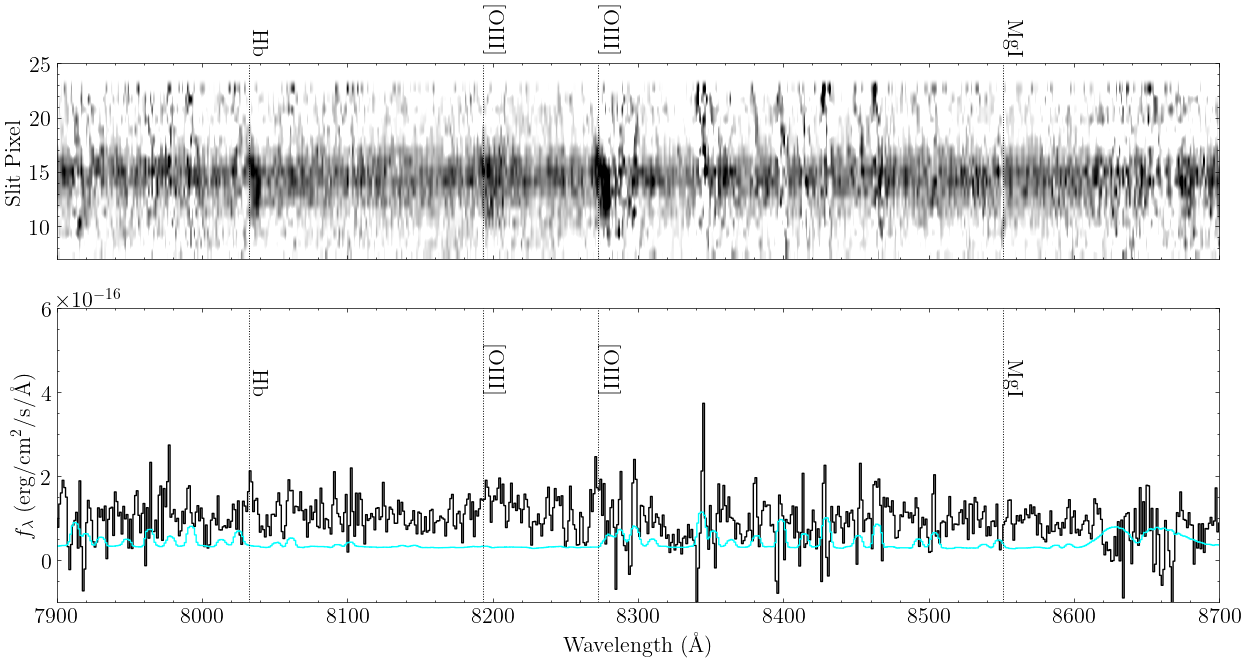

In [208]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 1, 884, vmin=0, vmax=80, 
            wav_min=7900, wav_max=8700,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.6518)

plot_spec_1d(axes[1], loaddir, 1, 884, smooth=True, dlam=0,
             wav_min=7900, wav_max=8700, z_gal=0.6518, 
             plot_lines=True,
             y_pos=4e-16,
             plot_model=False)

axes[1].set_ylim(-1e-16,6e-16)

(-1e-16, 4e-16)

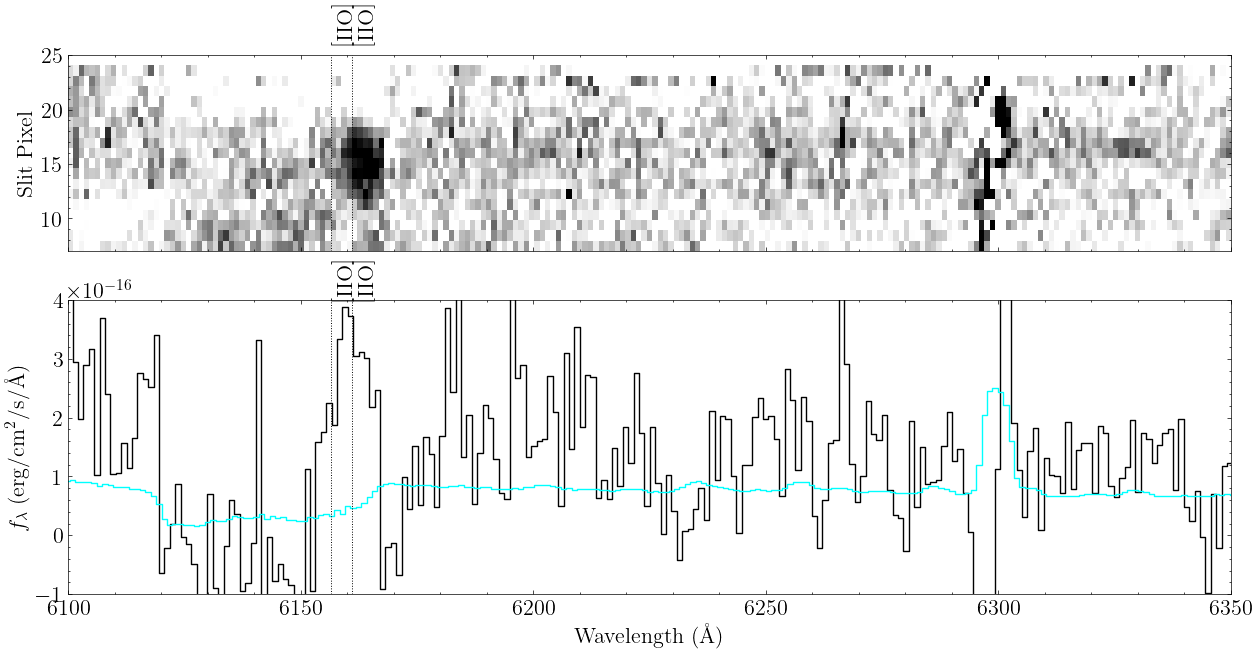

In [209]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 1, 884, vmin=0, vmax=50, 
            wav_min=6100, wav_max=6350,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.6518)

plot_spec_1d(axes[1], loaddir, 1, 884, smooth=True, dlam=0,
             wav_min=6100, wav_max=6350, z_gal=0.6518, 
             plot_lines=True,
             y_pos=4e-16,
             plot_model=False)

axes[1].set_ylim(-1e-16,4e-16)

In [210]:
wav, flux, err = load_ldss_spec_1d(loaddir, 1, 884)

In [211]:
calc_AB_mag(wav, flux, err, bandpasses_lam['F814W'],3)

(18.184, 0.014)

In [212]:
x = 10**((18.184-22.18)/2.5)

In [213]:
x

0.025211576308074145

In [214]:
calc_AB_mag(wav, x*flux, x*err, bandpasses_lam['pseudo_r'],3)

(21.046, 0.007)

In [215]:
calc_AB_mag(wav, x*flux, x*err, bandpasses_lam['pseudo_i'],2)

(22.12, 0.02)

In [216]:
idx = (wav>=6150)&(wav<=6170)
x*np.sum(flux[idx][:-1])*1.16/1e-17, x*np.sqrt(np.sum(err[idx][:-1]**2))*1.16/1e-17

(8.601421343279354, 0.6093053212638889)

In [77]:
#spec_1d_fits = fits.open(loaddir + 'Spectra_1D/m1/884_1dspec.fits')
#wav0 = spec_1d_fits[0].header['CRVAL1']
#delta_wav = spec_1d_fits[0].header['CDELT1']
#wav = np.arange(wav0, wav0+len(flux)*delta_wav, delta_wav)
#flux = spec_1d_fits[0].data[4,:]
#err = spec_1d_fits[0].data[5,:]

#plt.step(wav, flux, where='mid')
#plt.ylim(-100,2000)
#plt.xlim(6100,6200)

## Slit 306

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 306, vmin=0, vmax=40, 
             wav_min=6200, wav_max=8000,
             y_min=7)

In [ ]:
#eval_spec_z(loaddir, 306)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 306)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 306)
#plot_gal_lines(ax, z_best)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 757

In [217]:
#eval_spec_z(loaddir, 757)

In [218]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 757, z_min=1)

(-1e-17, 3e-16)

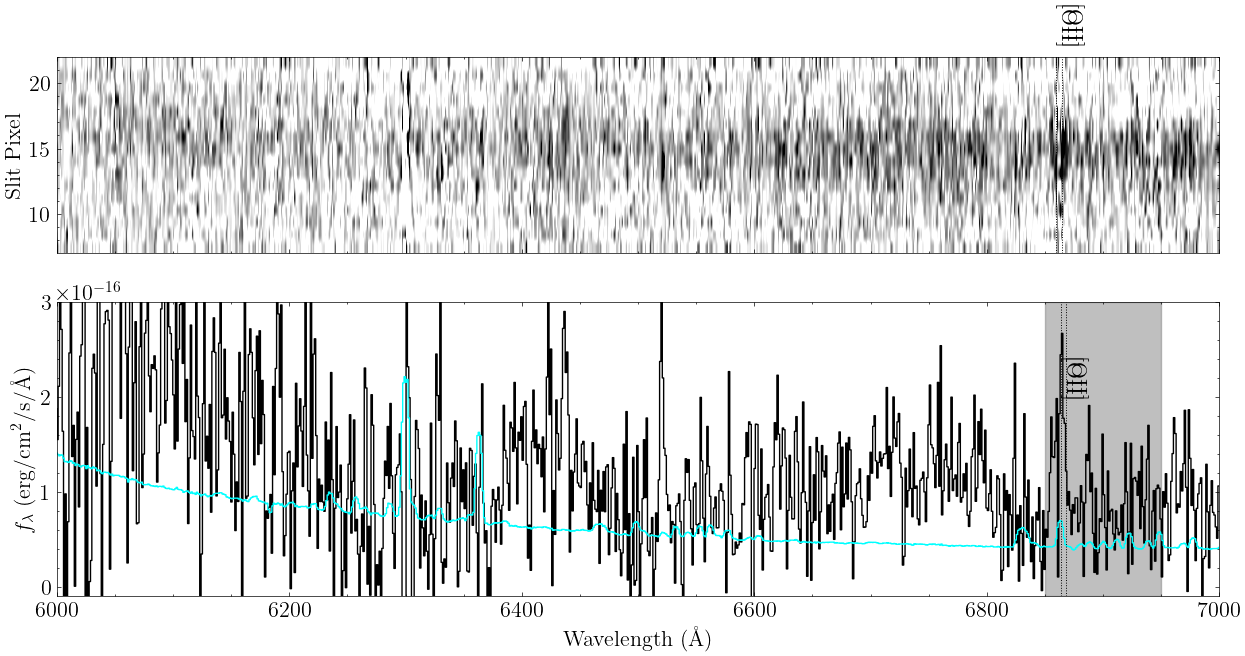

In [219]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 757, vmin=0, vmax=35, 
            wav_min=6000, wav_max=7000,
             y_min=7, y_max=22, plot_lines=True, y_pos=23, z_gal=0.8404)#0.8415)

plot_spec_1d(axes[1], loaddir, 1, 757, smooth=True, dlam=0,
             wav_min=6000, wav_max=7000, z_gal=0.8415, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(-1e-17,3e-16)

(-1e-17, 3e-16)

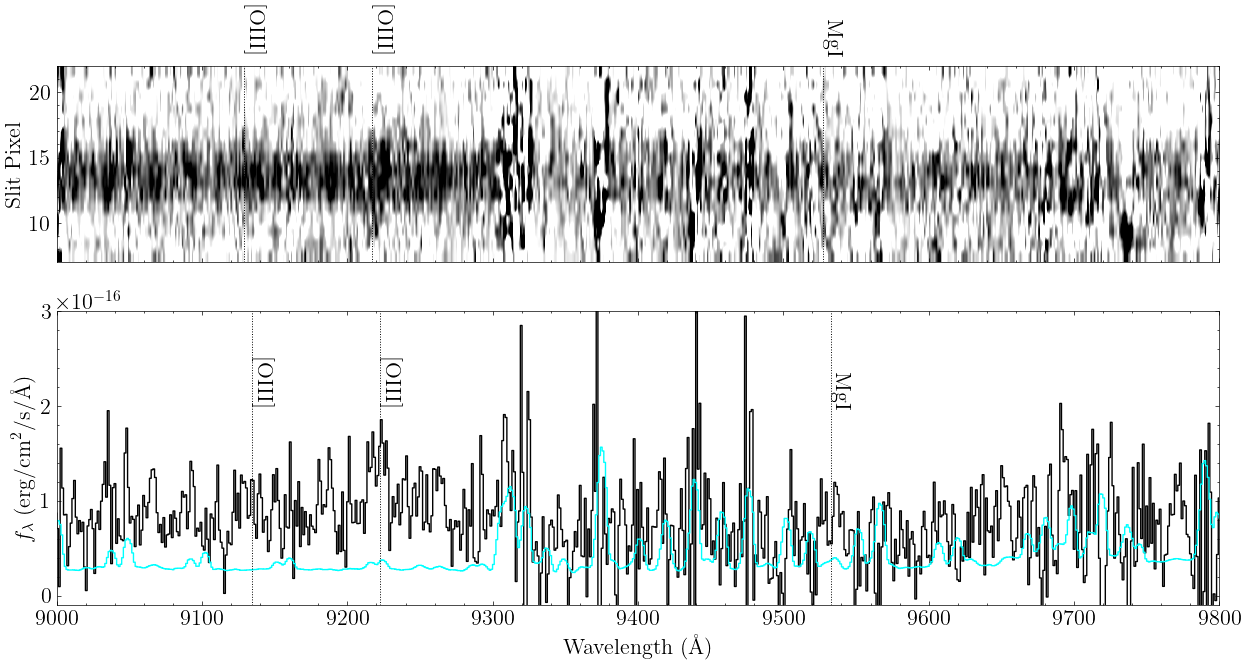

In [220]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 757, vmin=0, vmax=40, 
            wav_min=9000, wav_max=9800,
             y_min=7, y_max=22, plot_lines=True, y_pos=23, z_gal=0.8404)#0.8415)

plot_spec_1d(axes[1], loaddir, 1, 757, smooth=True, dlam=2,
             wav_min=9000, wav_max=9800, z_gal=0.8415, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(-1e-17,3e-16)

(-1e-17, 3e-16)

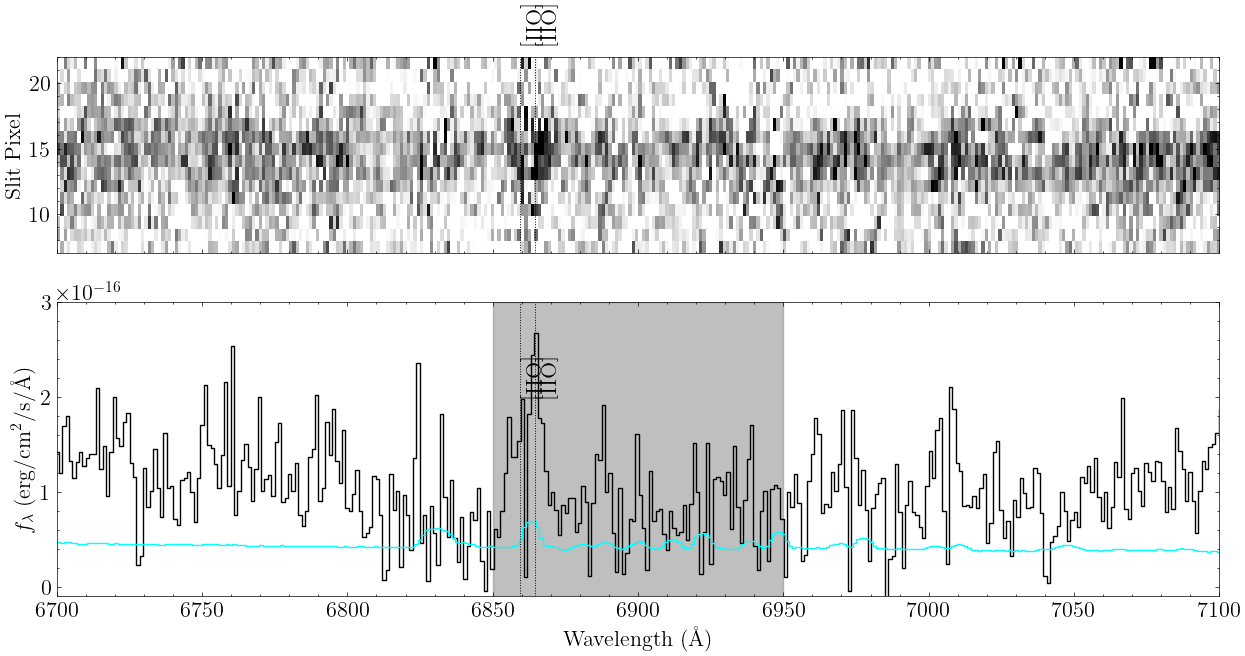

In [221]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 757, vmin=0, vmax=40, 
            wav_min=6700, wav_max=7100,
             y_min=7, y_max=22, plot_lines=True, y_pos=23, z_gal=0.8404)

plot_spec_1d(axes[1], loaddir, 1, 757, smooth=True, dlam=0,
             wav_min=6700, wav_max=7100, z_gal=0.8404, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(-1e-17,3e-16)

In [222]:
wav, flux, err = load_ldss_spec_1d(loaddir, 1, 757)

In [223]:
calc_AB_mag(wav, flux, err, bandpasses_lam['F814W'],3)

(18.13, 0.013)

In [224]:
x = 10**((18.13-23.367)/2.5)

In [225]:
x

0.008038962448571246

In [226]:
calc_AB_mag(wav, x*flux, x*err, bandpasses_lam['pseudo_i'],2)

(23.34, 0.02)

In [227]:
idx = (wav>=6850)&(wav<=6875)
x*np.sum(flux[idx][:-1])*1.16/1e-17, x*np.sqrt(np.sum(err[idx][:-1]**2))*1.16/1e-17

(2.4530219599826104, 0.21268582219695564)

## Slit 25

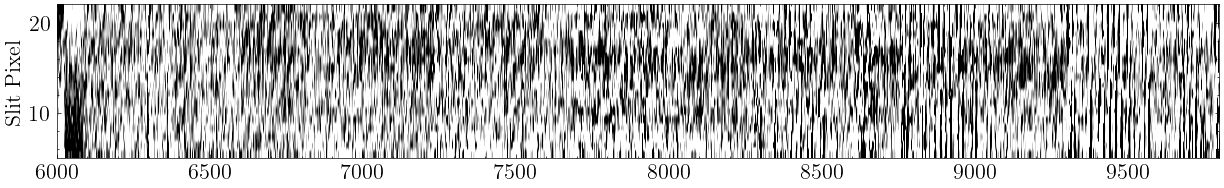

In [21]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 25, vmin=0, vmax=15)
#plot_gal_lines(ax, 1.09, plot_list=['OII', 'CaIIH'], pos_y=3)
#ax.set_xlim(6800, 7000)

In [22]:
#eval_spec_z(loaddir, 25)

In [23]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 25)

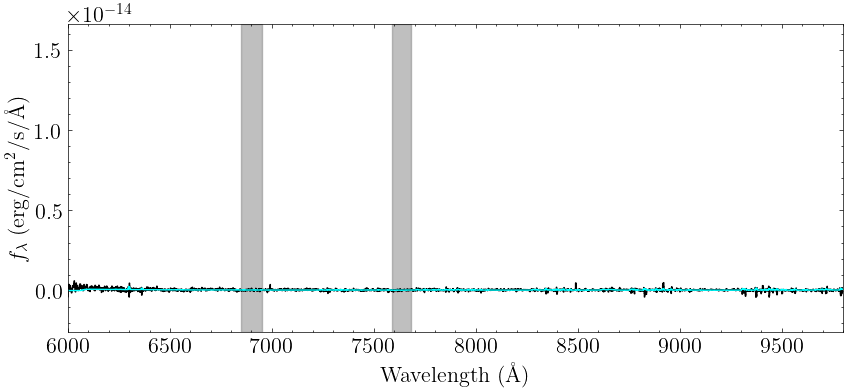

In [24]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 1, 25)
#plot_gal_lines(ax, z_best, plot_list=['Hb', 'OIII'])
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,1000)

## Slit 941

In [25]:
#eval_spec_z(loaddir, 941, wav_min=8600, wav_max=9300)

In [26]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 941, z_min=0.7)

(-1e-17, 3e-16)

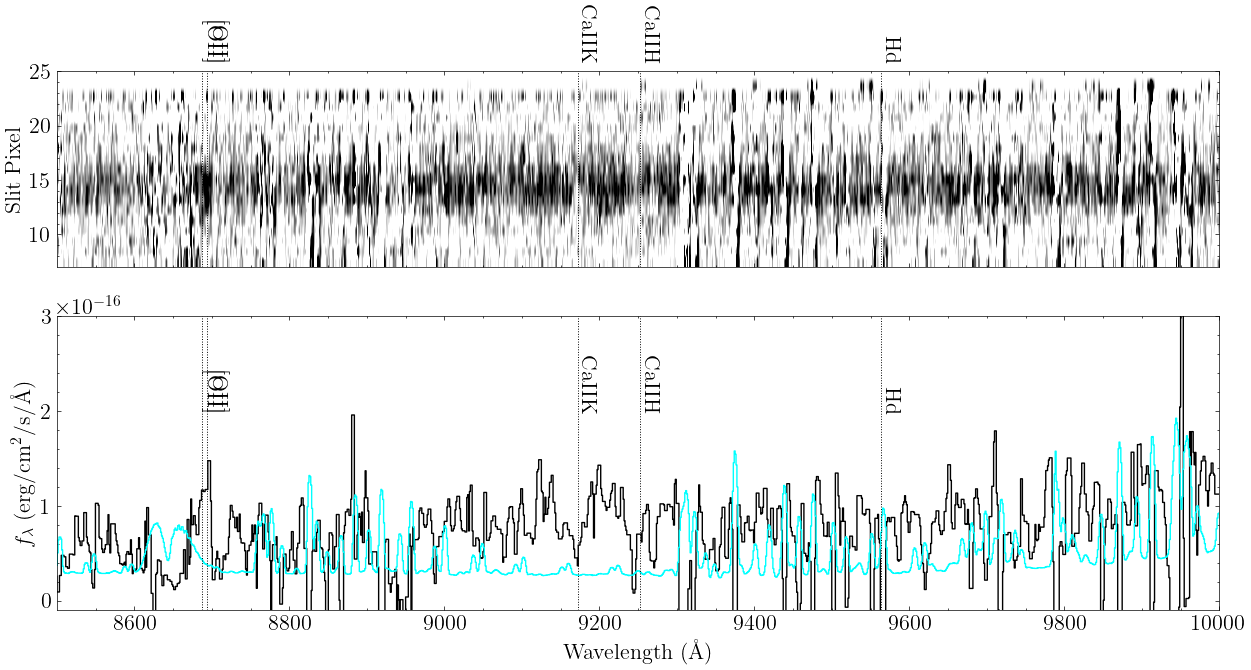

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 941, vmin=0, vmax=40, 
            wav_min=8500, wav_max=10000, 
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.331)

plot_spec_1d(axes[1], loaddir, 1, 941, smooth=True, dlam=5,
             wav_min=8500, wav_max=10000, z_gal=1.331,
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(-1e-17,3e-16)

(-1e-17, 3e-16)

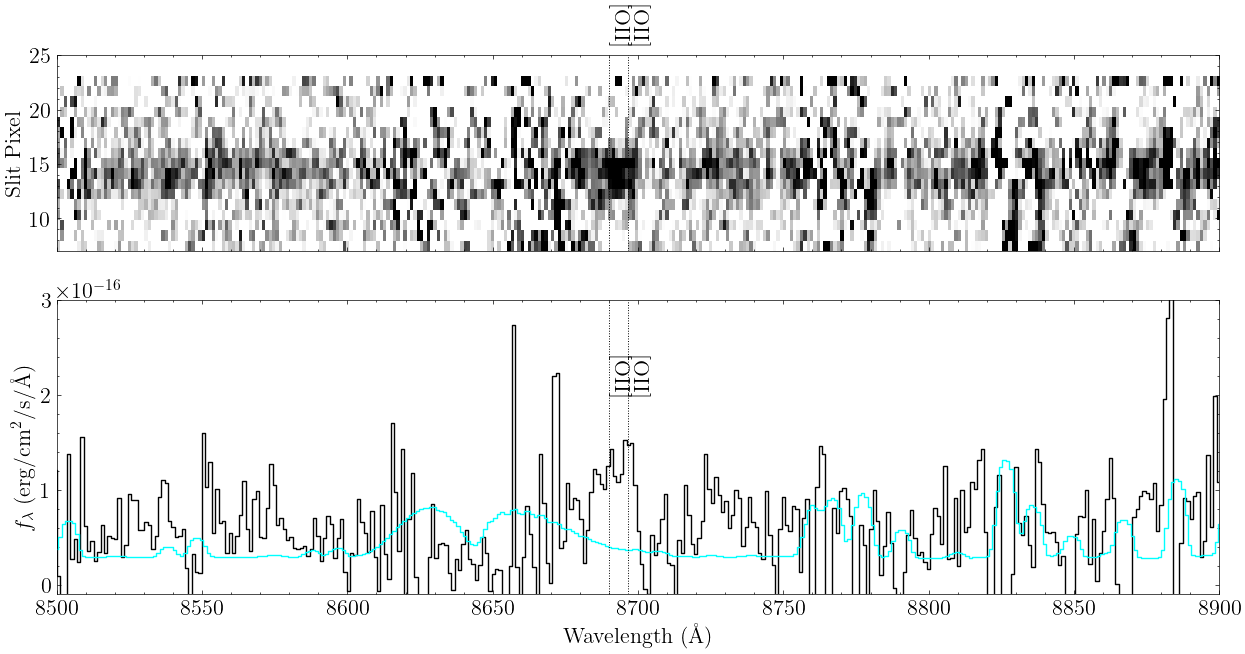

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 941, vmin=0, vmax=40, 
            wav_min=8500, wav_max=8900, 
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.3316)

plot_spec_1d(axes[1], loaddir, 1, 941, smooth=True, dlam=0,
             wav_min=8500, wav_max=8900, z_gal=1.3316,
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(-1e-17,3e-16)

## Slit 31

In [29]:
#eval_spec_z(loaddir, 31)

In [30]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 31)

(0.0, 2e-16)

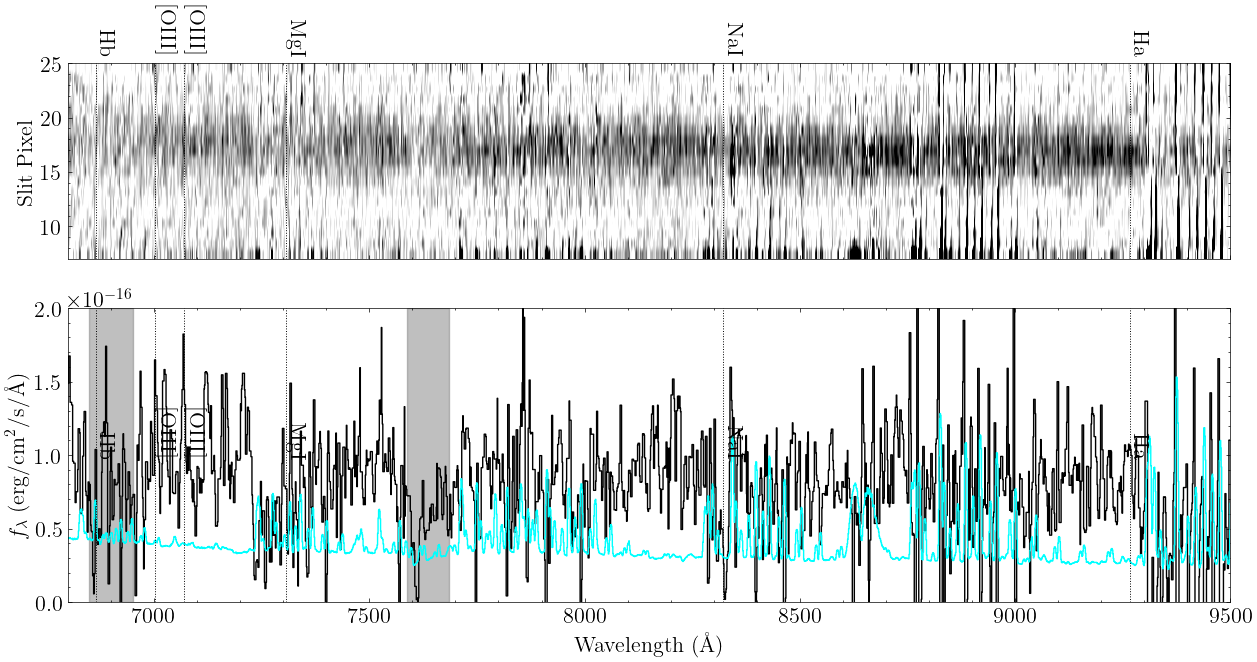

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 31, vmin=0, vmax=50, 
            wav_min=6800, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.4116)

plot_spec_1d(axes[1], loaddir, 1, 31, smooth=True, dlam=5,
             wav_min=6800, wav_max=9500, z_gal=0.4116, 
             plot_lines=True,
             y_pos=1e-16,
             plot_model=False)

axes[1].set_ylim(0,2e-16)

(0.0, 2e-16)

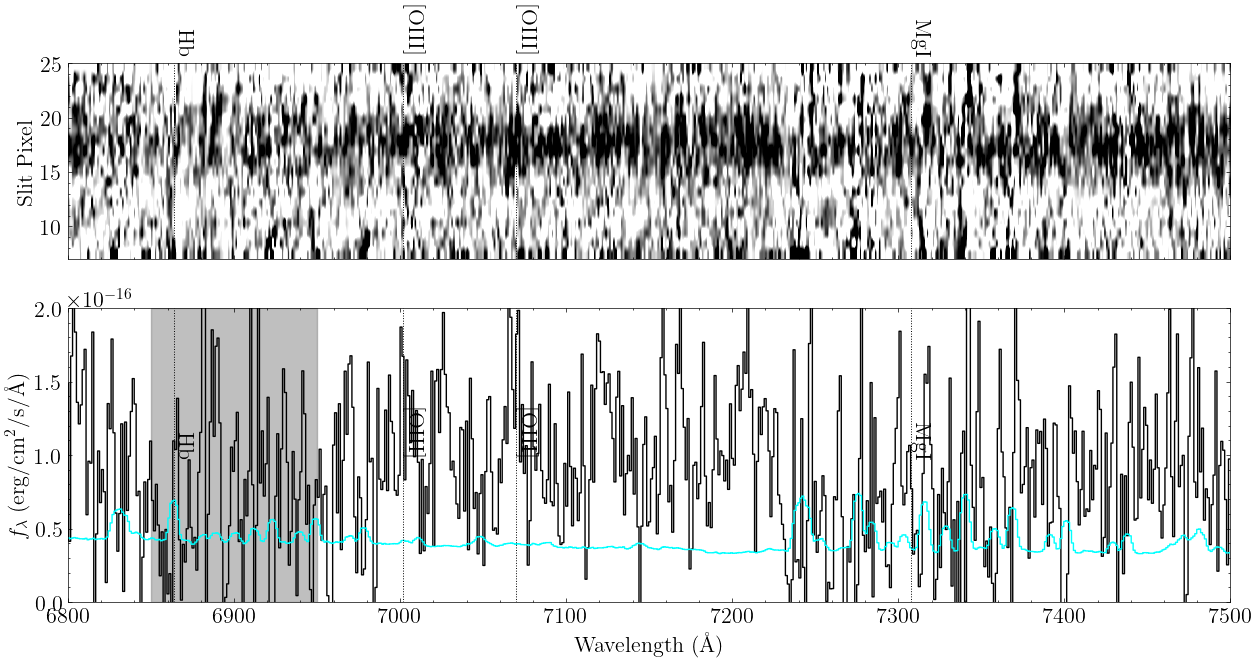

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 31, vmin=0, vmax=25, 
            wav_min=6800, wav_max=7500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.4116)

plot_spec_1d(axes[1], loaddir, 1, 31, smooth=True, dlam=0,
             wav_min=6800, wav_max=7500, z_gal=0.4116, 
             plot_lines=True,
             y_pos=1e-16,
             plot_model=False)

axes[1].set_ylim(0,2e-16)

## Slit 107

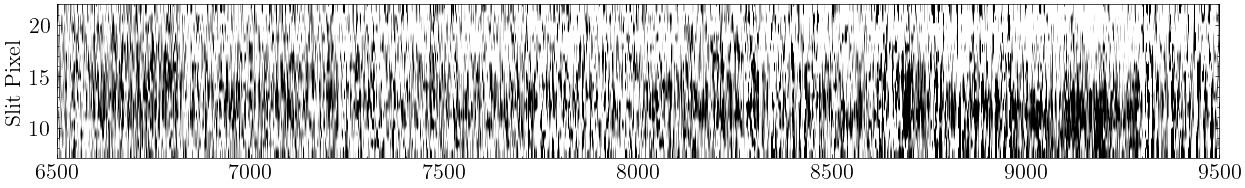

In [33]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 107, vmin=0, vmax=15, wav_min=6500, wav_max=9500,
            y_min=7)

In [37]:
#eval_spec_z(loaddir, 107)

In [38]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 107)

(0.0, 2e-16)

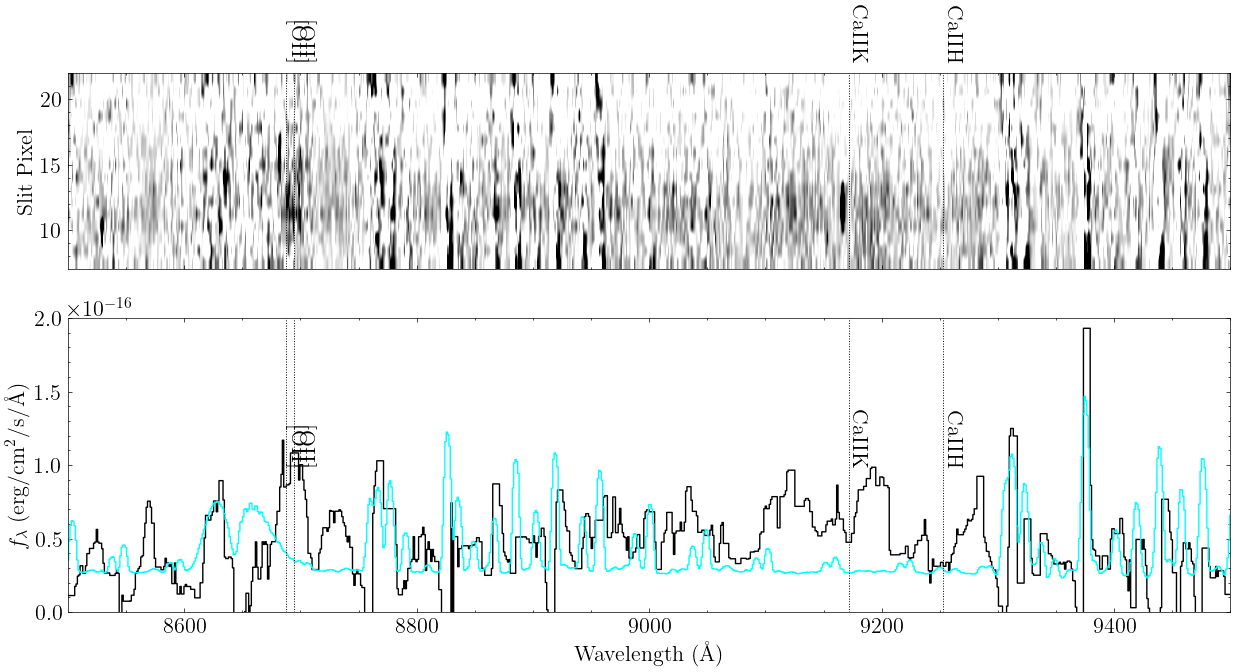

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 107, vmin=0, vmax=50, 
            wav_min=8500, wav_max=9500,
             y_min=7, y_max=22, plot_lines=True, y_pos=23, z_gal=1.331)

plot_spec_1d(axes[1], loaddir, 1, 107, smooth=True, dlam=10,
             wav_min=8500, wav_max=9500, z_gal=1.331, 
             plot_lines=True,
             y_pos=1e-16,
             plot_model=False)

axes[1].set_ylim(0,2e-16)

## Slit 844

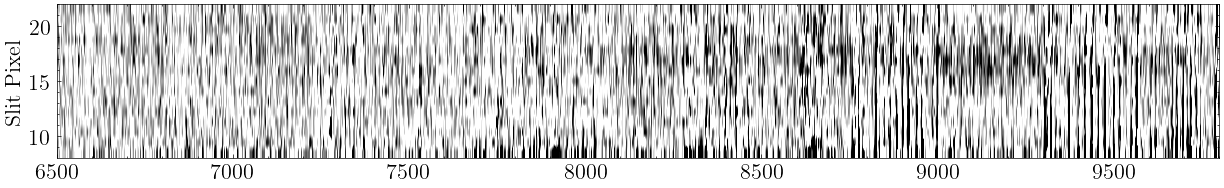

In [40]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 1, 844, vmin=0, vmax=20,
            wav_min=6500,
            y_min=8)
#plot_gal_lines(ax, 0.9, plot_list=['Hb', 'OIII'], pos_y=3)
#ax.set_xlim(6800, 7000)

In [41]:
#eval_spec_z(loaddir, 844)

In [42]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 844)

(0.0, 2e-16)

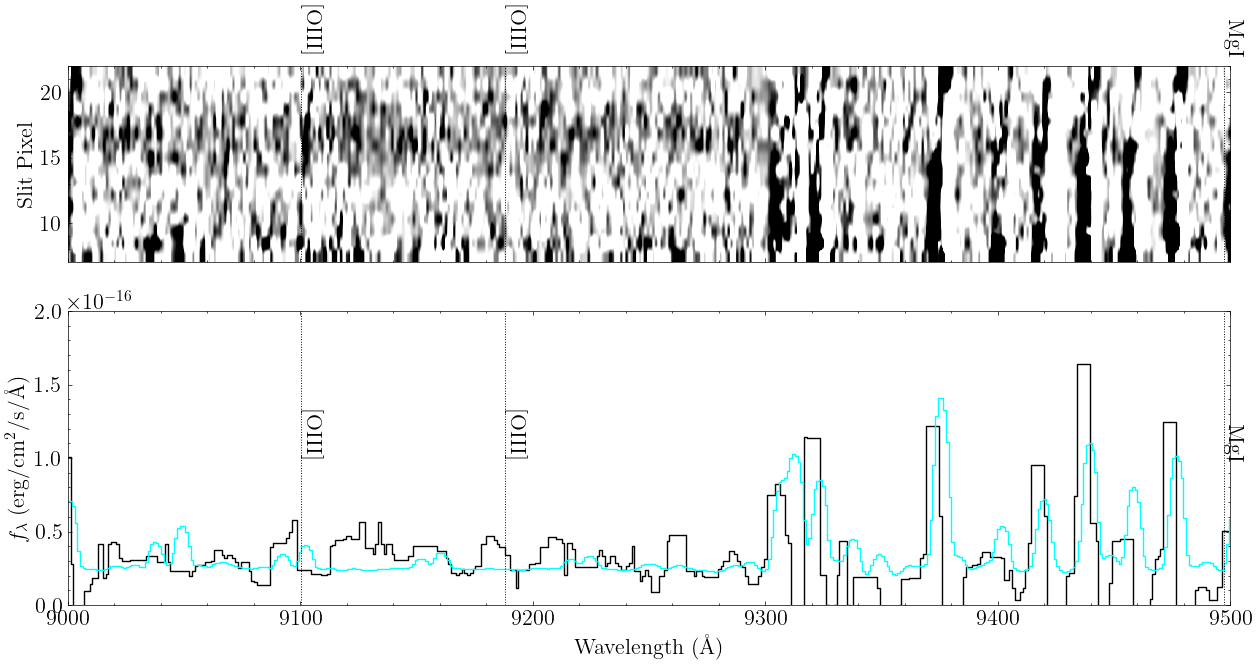

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 1, 844, vmin=0, vmax=25, 
            wav_min=9000, wav_max=9500,
             y_min=7, y_max=22, plot_lines=True, y_pos=23, z_gal=0.8346)

plot_spec_1d(axes[1], loaddir, 1, 844, smooth=True, dlam=10,
             wav_min=9000, wav_max=9500, z_gal=0.8346, 
             plot_lines=True,
             y_pos=1e-16,
             plot_model=False)

axes[1].set_ylim(0,2e-16)

# Mask 2

## Slit 394

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 2, 394, vmin=0, vmax=30)

In [ ]:
#eval_spec_z(loaddir, 394)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 394)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 2, 394)
#plot_gal_lines(ax, z_best, plot_list=['OIII', 'Hb', 'NaI'], pos_y=400)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,600)

## Slit 383

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 2, 383, vmin=0, vmax=30)
#plot_gal_lines(ax, 1.09, plot_list=['Hb', 'OIII'], pos_y=3)

In [ ]:
#eval_spec_z(loaddir, 383)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 383)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 2, 383)
#plot_gal_lines(ax, z_best, plot_list=['OIII', 'Hb', 'NaI'], pos_y=400)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-200,600)

## Slit 404

In [5]:
#eval_spec_z(loaddir, 404)

In [7]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 404, z_min=1)

(0.0, 3e-16)

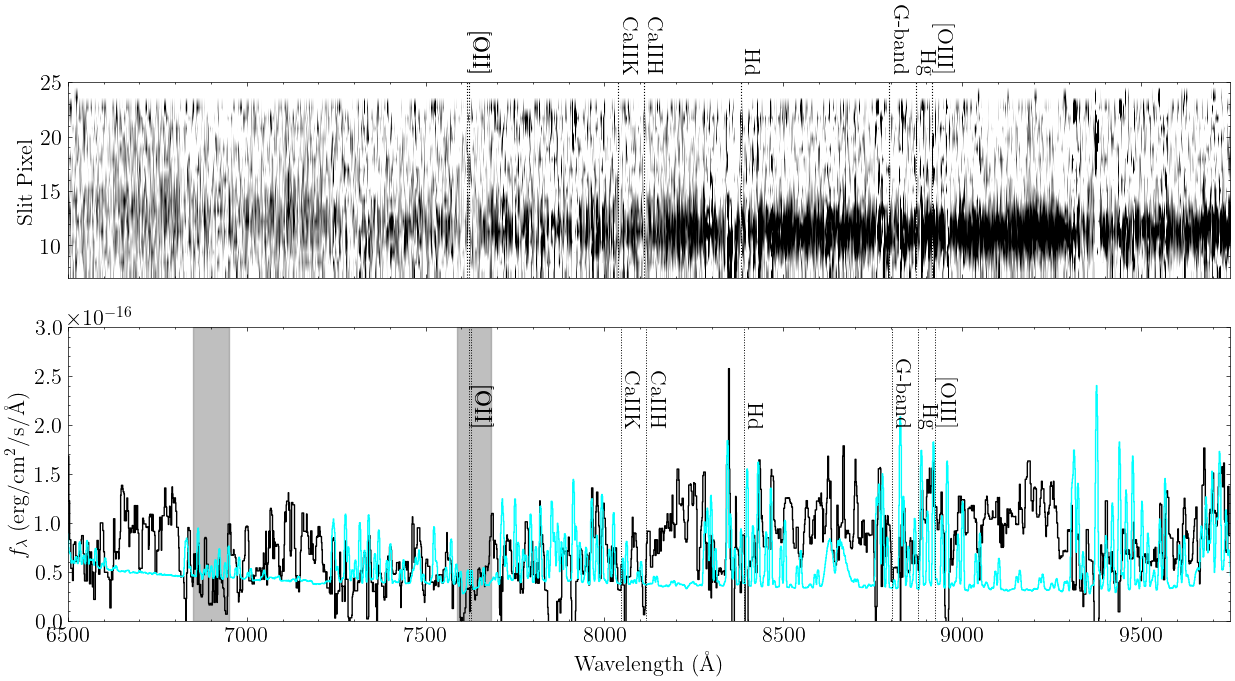

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 2, 404, vmin=0, vmax=30, 
            wav_min=6500, wav_max=9750,
            y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.043, lw=0.8,
            interpolation='bilinear')

plot_spec_1d(axes[1], loaddir, 2, 404, smooth=True, dlam=10,
             wav_min=6500, wav_max=9750, z_gal=1.0448, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

## Slit 473

In [ ]:
#eval_spec_z(loaddir, 473)#, wav_min=7000, wav_max=7550)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 473, z_min=1.0, z_max=1.1)

In [ ]:
#4000*(1+0.3869)

# z=0.5187 shows a Balmer jump?

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 473, vmin=0, vmax=750,
            wav_min=6500, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.469)

plot_spec_1d(axes[1], loaddir, 2, 473, smooth=True, dlam=3,
             wav_min=6500, wav_max=9500, z_gal=0.469,
             plot_lines=True,
             y_pos=1e-15,
             plot_model=False)

axes[1].set_ylim(0,3e-15)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 473, vmin=0, vmax=900,
            wav_min=8000, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.26)

plot_spec_1d(axes[1], loaddir, 2, 473, smooth=True, dlam=2,
             wav_min=8000, wav_max=9500, z_gal=1.26,
             plot_lines=True,
             y_pos=1e-15,
             plot_model=False)

axes[1].set_ylim(0,3e-15)

## Slit 691

In [ ]:
#eval_spec_z(loaddir, 691)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 691)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 691, vmin=0, vmax=50, interpolation='gaussian',
            wav_min=6500, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.5859)

plot_spec_1d(axes[1], loaddir, 2, 691, smooth=True, dlam=10,
             wav_min=6500, wav_max=9500, z_gal=0.5859, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

## Slit 455

In [ ]:
#eval_spec_z(loaddir, 455)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 455)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 455, vmin=0, vmax=60, 
            wav_min=7000, wav_max=9000,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.4670)

plot_spec_1d(axes[1], loaddir, 2, 455, smooth=True, dlam=5,
             wav_min=7000, wav_max=9000, z_gal=0.4670, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 455, vmin=0, vmax=60, 
            wav_min=7000, wav_max=9000,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.1197)

plot_spec_1d(axes[1], loaddir, 2, 455, smooth=True, dlam=5,
             wav_min=7000, wav_max=9000, z_gal=0.1197, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 455, vmin=0, vmax=60, 
            wav_min=7200, wav_max=7500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.4670)

plot_spec_1d(axes[1], loaddir, 2, 455, smooth=True, dlam=1,
             wav_min=7200, wav_max=7500, z_gal=0.4670, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 455, vmin=0, vmax=60, 
            wav_min=7200, wav_max=7500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.1191)

plot_spec_1d(axes[1], loaddir, 2, 455, smooth=True, dlam=1,
             wav_min=7200, wav_max=7500, z_gal=0.1191, 
             plot_lines=True,
             plot_list = ['Ha', 'NII', 'SII'],
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

## Slit 536

In [ ]:
#eval_spec_z(loaddir, 536)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 536, z_min=1, z_max=1.1)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 2, 536, vmin=0, vmax=50, 
            wav_min=7500, wav_max=11000,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.438)

plot_spec_1d(axes[1], loaddir, 2, 536, smooth=True, dlam=5,
             wav_min=7500, wav_max=11000, z_gal=1.438, 
             plot_lines=True,
             y_pos=2e-16,
             #plot_list=['Ha', 'NII', 'SII'],
             plot_model=False)

axes[1].set_ylim(0,4e-16)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})


plot_spec_2d(axes[0], loaddir, 2, 536, vmin=0, vmax=50, 
            wav_min=9000, wav_max=9200,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.4378)

plot_spec_1d(axes[1], loaddir, 2, 536, smooth=True, dlam=0,
             wav_min=9000, wav_max=9200, z_gal=1.4378, 
             plot_lines=True,
             y_pos=2e-16,
             #plot_list=['Ha', 'NII', 'SII'],
             plot_model=False)

axes[1].set_ylim(0,4e-16)

## Slit 830

In [ ]:
fig, ax = plt.subplots(1, figsize=(15,2))
plot_spec_2d(ax, loaddir, 2, 830, vmin=0, vmax=10)

In [ ]:
#eval_spec_z(loaddir, 830)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 830)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,4))
plot_spec_1d(ax, loaddir, 2, 830)
#plot_gal_lines(ax, z_best, plot_list=['OIII', 'Hb'], pos_y=800)
#ax.set_xlim(6500, 10000)
#ax.set_ylim(-100,1500)

## Slit 22

In [228]:
#eval_spec_z(loaddir, 22)

In [229]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 22)

(0.0, 7e-16)

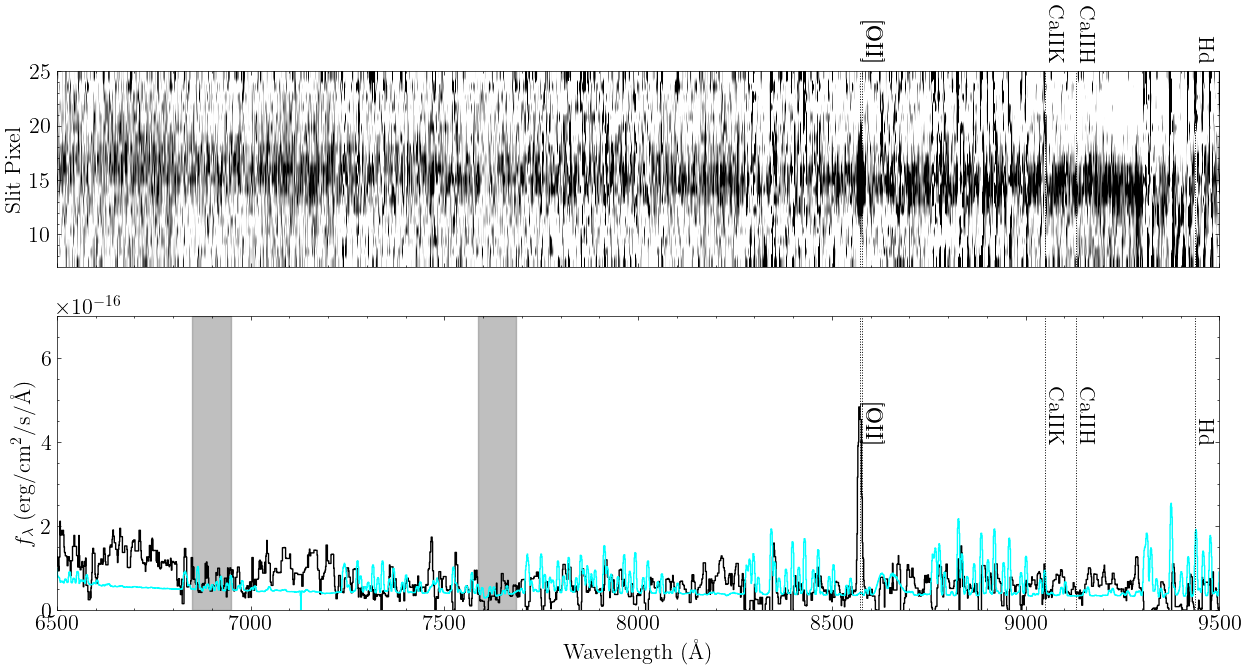

In [230]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 22, vmin=0, vmax=30, 
            wav_min=6500, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.3)

plot_spec_1d(axes[1], loaddir, 2, 22, smooth=True, dlam=10,
             wav_min=6500, wav_max=9500, z_gal=1.3, 
             plot_lines=True,
             y_pos=4e-16,
             plot_model=False)

axes[1].set_ylim(0,7e-16)

(0.0, 7e-16)

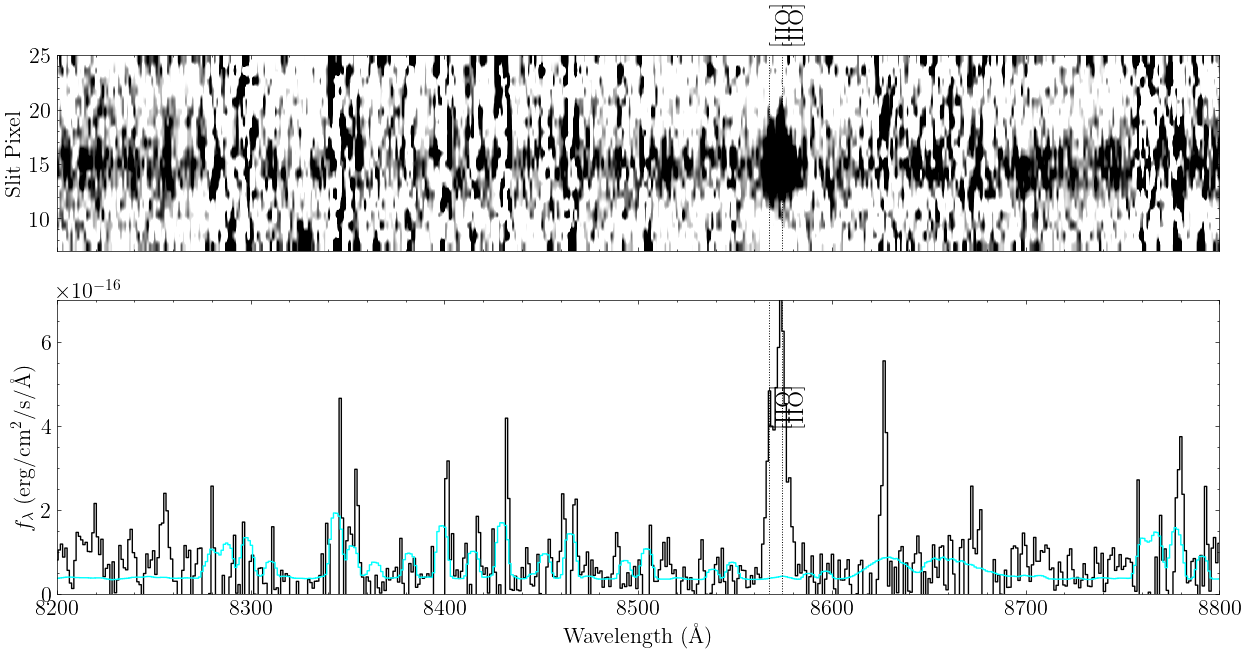

In [231]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 22, vmin=0, vmax=30, 
            wav_min=8200, wav_max=8800,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=1.2988)

plot_spec_1d(axes[1], loaddir, 2, 22, smooth=True, dlam=0,
             wav_min=8200, wav_max=8800, z_gal=1.2988, 
             plot_lines=True,
             y_pos=4e-16,
             plot_model=False)

axes[1].set_ylim(0,7e-16)

In [232]:
wav, flux, err = load_ldss_spec_1d(loaddir, 2, 22)

In [233]:
calc_AB_mag(wav, .008*flux, .008*err, bandpasses_lam['F814W'],3)

(24.098, 0.039)

In [234]:
calc_AB_mag(wav, .008*flux, .008*err, bandpasses_lam['pseudo_i'],2)

(24.0, 0.04)

In [235]:
idx = (wav>=8560)&(wav<=8590)
0.008*np.sum(flux[idx][:-1])*1.16/1e-17, 0.008*np.sqrt(np.sum(err[idx][:-1]**2))*1.16/1e-17

(5.6210756925182706, 0.18316196473826343)

## Slit 309

In [ ]:
#eval_spec_z(loaddir, 309)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 309)#, z_min=0.4, z_max=0.5)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 309, vmin=0, vmax=250, 
            wav_min=6500, wav_max=9500,
             y_min=7, y_max=20, plot_lines=True, y_pos=22, z_gal=0.4190)

plot_spec_1d(axes[1], loaddir, 2, 309, smooth=True, dlam=5,
             wav_min=6500, wav_max=9500, z_gal=0.4190, 
             plot_lines=True,
             y_pos=5e-16,
             plot_model=False)

axes[1].set_ylim(0,1e-15)

## Slit 328

In [186]:
#eval_spec_z(loaddir, 328)

In [187]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 328)

(0.0, 3e-16)

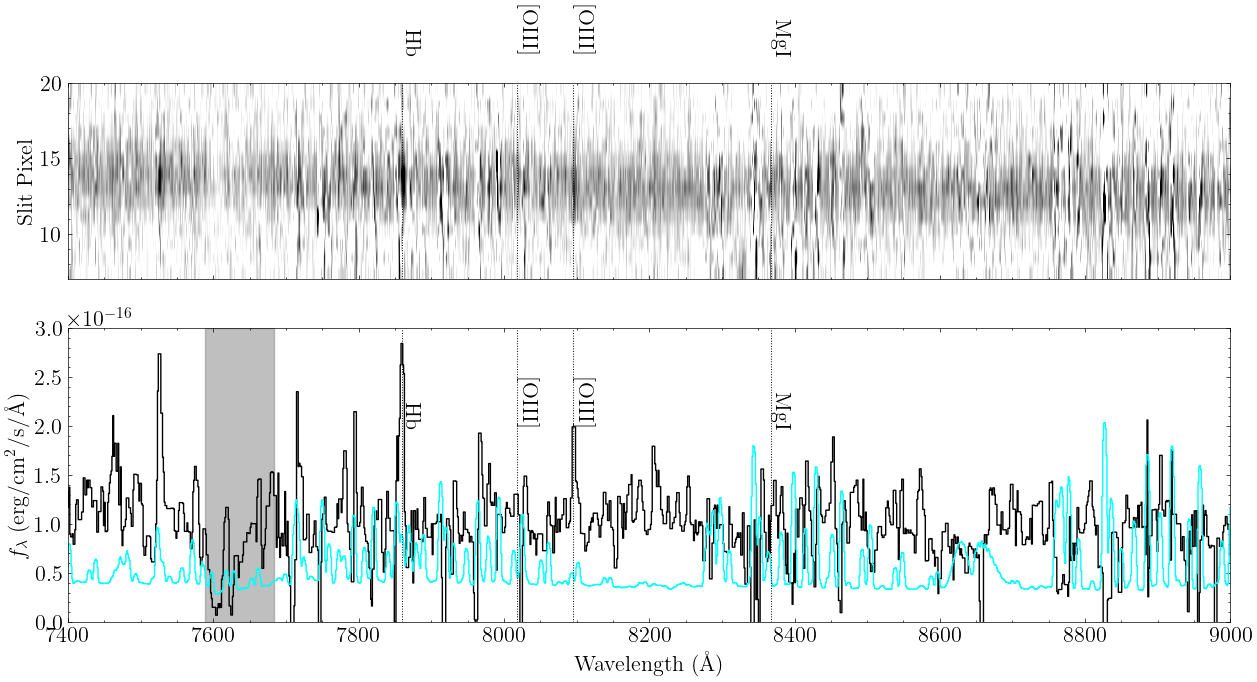

In [188]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 328, vmin=0, vmax=100, 
            wav_min=7400, wav_max=9000,
             y_min=7, y_max=20, plot_lines=True, y_pos=22, z_gal=0.6164)

plot_spec_1d(axes[1], loaddir, 2, 328, smooth=True, dlam=5,
             wav_min=7400, wav_max=9000, z_gal=0.6164, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

In [189]:
3729*(1+0.6164)

6027.555600000001

(0.0, 3e-16)

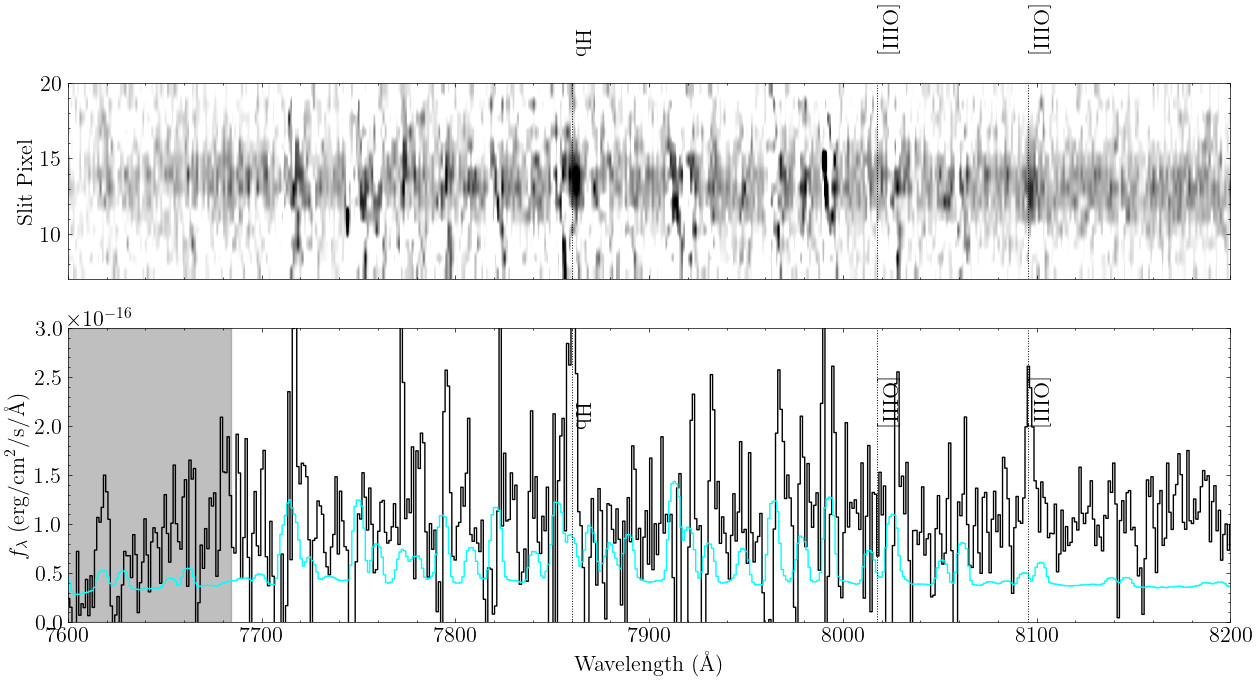

In [190]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 328, vmin=0, vmax=100, 
            wav_min=7600, wav_max=8200,
             y_min=7, y_max=20, plot_lines=True, y_pos=22, z_gal=0.6164)

plot_spec_1d(axes[1], loaddir, 2, 328, smooth=True, dlam=0,
             wav_min=7600, wav_max=8200, z_gal=0.6164, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,3e-16)

In [191]:
wav, flux, err = load_ldss_spec_1d(loaddir, 2, 328)

In [192]:
calc_AB_mag(wav, flux, err, bandpasses_lam['F814W'],3)

(18.144, 0.019)

In [193]:
x = 10**((18.144-23.3)/2.5)

In [194]:
x

0.008661637419723017

In [195]:
calc_AB_mag(wav, x*flux, x*err, bandpasses_lam['pseudo_i'],2)

(23.23, 0.02)

## Slit 18

In [ ]:
#eval_spec_z(loaddir, 18)

In [ ]:
#fig, ax = plt.subplots(1, figsize=(8,4))
#z_best = plot_chi_sq_z(ax, loaddir, 18)

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15,7), sharex=True, squeeze=True, 
                       gridspec_kw = {'height_ratios':[1,1.5]})

plot_spec_2d(axes[0], loaddir, 2, 18, vmin=0, vmax=40, 
            wav_min=6500, wav_max=9500,
             y_min=7, y_max=25, plot_lines=True, y_pos=26, z_gal=0.9344)

plot_spec_1d(axes[1], loaddir, 2, 18, smooth=True, dlam=0,
             wav_min=6500, wav_max=9500, z_gal=0.9344, 
             plot_lines=True,
             y_pos=2e-16,
             plot_model=False)

axes[1].set_ylim(0,4e-16)

# Test saved spectra

In [ ]:
spec_1d = np.loadtxt(loaddir + 'Spectra_1D/m2/309.dat')

In [ ]:
wav = spec_1d[:,0]
flux = spec_1d[:,1]
err = spec_1d[:,2]

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,3))

ax.step(wav, flux, where='mid')
ax.step(wav, err, where='mid')
ax.axvline(3727*(2.33))

ax.set_xlim(6000,10000)
ax.set_ylim(0, 1e-15)